In [1]:
import pandas as pd
import anal_preprocess as ap
import seaborn as sns
import matplotlib.pyplot as plt
import get_numcatg_data as gnca
df = pd.read_csv("./26_problem1.csv")
input_data = df.copy()

In [2]:
mdsource = gnca.GetNumericCategoryAllData(input_data, df)
col_out = ""
numeric_data, catg_data, ctg_data = mdsource.main(col_out)

종속변수 없음
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 : 1개, ['Income'] 
ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64
KNN 알고리즘 대체
결측치 대체 후 검정 결측치 컬럼갯수 : 0 
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
이상치를 결측치로 대체한 후 KNN 방식으로 대체 ... 2차결측치 검증 진행
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 : 10개, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchas

In [3]:
df1 = pd.concat([numeric_data,ctg_data], axis=1)
df1.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Marital_Status,Marital_Status_encd
0,5524,1957,58138.0,0,0,635.0,31.0,546.0,73.4,20.8,3.0,8.0,10.0,4,7.0,Single,4
1,2174,1954,46344.0,1,1,11.0,1.0,6.0,2.0,1.0,2.0,1.0,1.0,2,5.0,Single,4
2,4141,1965,71613.0,0,0,426.0,49.0,127.0,111.0,21.0,1.0,8.0,2.0,10,4.0,Together,5
3,6182,1984,26646.0,1,0,11.0,4.0,20.0,10.0,3.0,2.0,2.0,0.0,4,6.0,Together,5
4,5324,1981,58293.0,1,0,173.0,43.0,118.0,46.0,27.0,5.0,5.0,3.0,6,5.0,Married,3


In [4]:
df2 = df1[df1.columns.difference(['Marital_Status'])]
df2.head()

,ID,Income,Kidhome,Marital_Status_encd,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Teenhome,Year_Birth
0,5524,58138.0,0,4,73.4,31.0,546.0,20.8,635.0,10.0,3.0,4,8.0,7.0,0,1957
1,2174,46344.0,1,4,2.0,1.0,6.0,1.0,11.0,1.0,2.0,2,1.0,5.0,1,1954
2,4141,71613.0,0,5,111.0,49.0,127.0,21.0,426.0,2.0,1.0,10,8.0,4.0,0,1965
3,6182,26646.0,1,5,10.0,4.0,20.0,3.0,11.0,0.0,2.0,4,2.0,6.0,0,1984
4,5324,58293.0,1,3,46.0,43.0,118.0,27.0,173.0,3.0,5.0,6,5.0,5.0,0,1981


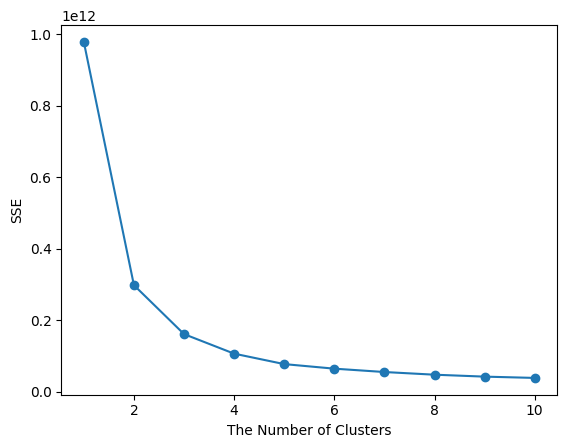

[978378325474.2031, 298428536457.93335, 161662142123.44302, 107018450614.08353, 77811210915.16516, 65064648969.059525, 55678092040.38013, 48204830656.52323, 42799693197.77874, 39188670201.81006]


In [5]:
from sklearn.cluster import KMeans
def elbow(x):
    sse=[]
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(df2)


In [6]:
# K-Means 기법을 사용하여 3개의 군집으로 데이터를 나누어보자
km = KMeans(n_clusters = 3, random_state=1)
km.fit(df2)

KMeans(n_clusters=3, random_state=1)

In [13]:
new_labels = km.labels_
df2['cluster']=new_labels

### 군집분석

In [14]:
data = df2.copy()

In [15]:
data['cluster'].value_counts()

cluster
2    791
1    734
0    715
Name: count, dtype: int64

In [17]:
group_mean = data.groupby("cluster").mean()
group_mean.reset_index(inplace=True)
group_mean

,cluster,ID,Income,Kidhome,Marital_Status_encd,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Teenhome,Year_Birth
0,0,5739.041958,75544.142657,0.092308,3.721678,48.429930,32.013706,275.946014,30.884476,570.118042,5.177063,1.520559,8.490909,5.490350,3.299301,0.377622,1967.293706
1,1,5702.596730,28063.932425,0.807902,3.708447,7.588828,5.316621,22.837875,5.349046,29.727520,0.487193,1.982834,3.050409,2.068665,6.685014,0.306540,1973.065395
2,2,5356.911504,51663.333796,0.424779,3.757269,18.828824,12.469532,89.061441,12.745386,268.543110,2.123894,2.675095,5.891277,4.559292,5.704172,0.807838,1966.219975


In [19]:
group_mean[["Year_Birth","Income","Kidhome","Teenhome"]]

,Year_Birth,Income,Kidhome,Teenhome
0,1967.293706,75544.142657,0.092308,0.377622
1,1973.065395,28063.932425,0.807902,0.306540
2,1966.219975,51663.333796,0.424779,0.807838


In [21]:
mnt_group = group_mean[["cluster","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts"]]
mnt_group.set_index("cluster", inplace=True)
mnt_group

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,570.118042,32.013706,275.946014,48.429930,30.884476
1,29.727520,5.316621,22.837875,7.588828,5.349046
2,268.543110,12.469532,89.061441,18.828824,12.745386


In [23]:
import numpy as np
sum_group_mnt = np.array(mnt_group.sum(1))
sum_group_mnt.reshape(3,1)

array([[957.39216783],
       [ 70.81989101],
       [401.6482933 ]])

In [25]:
mnt_group/sum_group_mnt.reshape(3,1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,0.595491,0.033438,0.288227,0.050585,0.032259
1,0.419762,0.075072,0.322478,0.107157,0.075530
2,0.668603,0.031046,0.221740,0.046879,0.031733


### 해석
#### 그룹 0은 평균연령 1967년생, 소득이 가장 많은 집단으로 전체 구매수 1214로 가장 높고, 그중 와인 구매가 높다 --> 와인추천
#### 그룹 1은 평균연령 1973년생, 소득이 가장 낮으며 영유아를 키우는 집단으로 소비역시 가장 적고, 와인과 고기 구매가 높다 --> 와인 or 고기 추천
#### 그룹 2는 평균연령 1966년생, 10대를 키우는 비중운 집단으로 완인 소비가 상대적으로 높고 그룹 0과 유사한 소비형태를 띈다 --> 와인추천

In [27]:
data.loc[data["ID"]==10870]

,ID,Income,Kidhome,Marital_Status_encd,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Teenhome,Year_Birth,cluster
2235,10870,61223.0,0,3,42.0,43.0,182.0,21.0,709.0,3.0,2.0,4,9.0,5.0,1,1967,2


In [28]:
num_group = group_mean[["cluster","NumCatalogPurchases","NumDealsPurchases","NumStorePurchases","NumWebPurchases","NumWebVisitsMonth"]]
num_group.set_index("cluster", inplace=True)
num_group

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
cluster,,,,,
0,5.177063,1.520559,8.490909,5.490350,3.299301
1,0.487193,1.982834,3.050409,2.068665,6.685014
2,2.123894,2.675095,5.891277,4.559292,5.704172
